In [5]:
from torchvision import datasets
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torch
from torch import nn

In [4]:
data_path = './data'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

Files already downloaded and verified
Files already downloaded and verified


In [32]:
conv = nn.Conv2d(3, 16, kernel_size=3, padding=1)
conv.weight.shape, cov.bias.shape

(torch.Size([16, 3, 3, 3]), torch.Size([16]))

torch.Size([1, 16, 32, 32]) torch.Size([3, 32, 32])


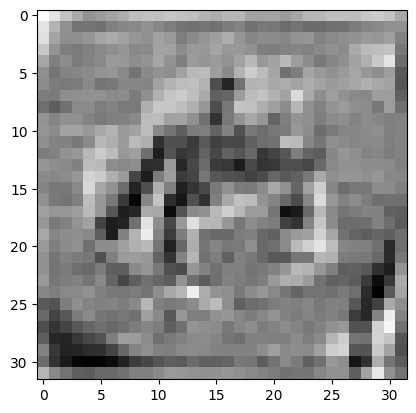

In [33]:
img, _ = cifar10[0]
output = conv(img.unsqueeze(0))
print(output.shape, img.shape)
plt.imshow(output[0, 0].detach(), cmap='gray')

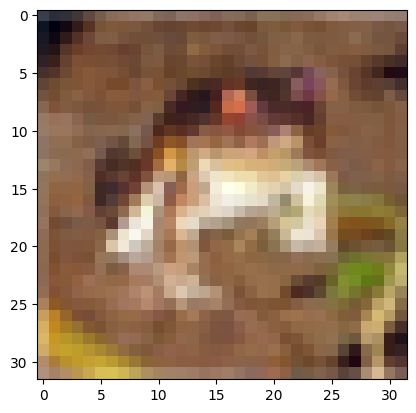

In [34]:
def show_img(i_img):
    max_val = i_img.max()
    min_val = i_img.min()
    n_img = (i_img - min_val) / (max_val - min_val)
    plt.imshow(n_img.permute(1, 2, 0))
    
show_img(img)

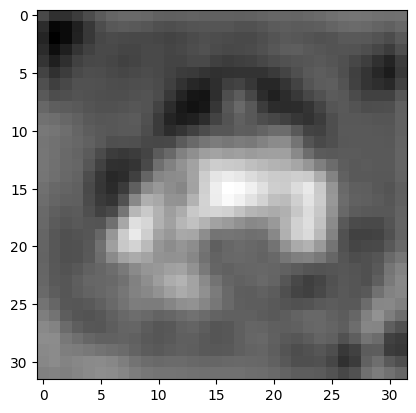

In [37]:
with torch.no_grad():
    conv.bias.zero_()
    
with torch.no_grad():
    conv.weight.fill_(1.0 / 9.0)
    
output = conv(img.unsqueeze(0))
plt.imshow(output[0, 0].detach(), cmap='gray')

In [38]:
conv = nn.Conv2d(3, 1, kernel_size=1, padding=1)
with torch.no_grad():
    conv.weight[:] = torch.tensor([[-1.0, 0.0, 1.0],
                                     [-1.0, 0.0, 1.0],
                                     [-1.0, 0.0, 1.0]])
    conv.bias.zero_()

output = conv(img.unsqueeze(0))
plt.imshow(output[0, 0].detach(), cmap='gray') 

RuntimeError: The expanded size of the tensor (1) must match the existing size (3) at non-singleton dimension 3.  Target sizes: [1, 3, 1, 1].  Tensor sizes: [3, 3]